<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential
from scipy.misc import toimage
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#use of Learning rate scheduler to avoid overfitting
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10 
(X_train_original, y_train_original), (X_test_original, y_test_original) = cifar10.load_data()


##K-Fold 1:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001

In [0]:
split = X_train.shape[0] // 5
X_train_val = X_train[:split]
X_train = X_train[split:]
y_train_val = y_train[:split]
y_train = y_train[split:]


###Model:

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=0.000001)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# model.summary()


 
 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
10000/10000 [==============================] - 1s 128us/step

 Test score:  1.3204602296829224

Test accuracy:  57.03


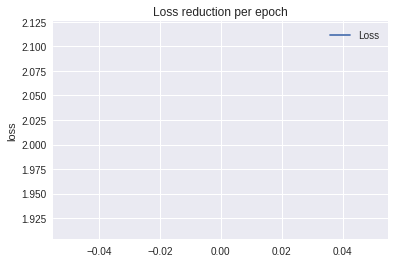

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 1
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score1 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score1[0])
print("\nTest accuracy: ", score1[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 2:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[split:2*split]
arg1 = X_train[:split]
arg3 = y_train[:split]
arg2 = X_train[2*split:]
arg4 = y_train[2*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[split:2*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/1
10000/10000 [==============================] - 1s 124us/step

 Test score:  0.8591835422515869

Test accuracy:  73.95


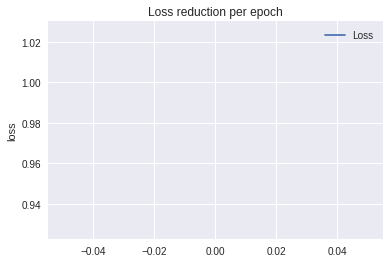

In [17]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 1
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score2 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score2[0])
print("\nTest accuracy: ", score2[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 3:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[2*split:3*split]
arg1 = X_train[:2*split]
arg3 = y_train[:2*split]
arg2 = X_train[3*split:]
arg4 = y_train[3*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[2*split:3*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/1
10000/10000 [==============================] - 1s 122us/step

 Test score:  1.232065219306946

Test accuracy:  63.04


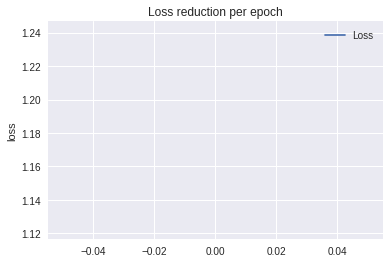

In [10]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 1
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score3 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score3[0])
print("\nTest accuracy: ", score3[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 4:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[3*split:4*split]
arg1 = X_train[:3*split]
arg3 = y_train[:3*split]
arg2 = X_train[4*split:]
arg4 = y_train[4*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[3*split:4*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/1
10000/10000 [==============================] - 1s 120us/step

 Test score:  0.9518917252540589

Test accuracy:  70.73


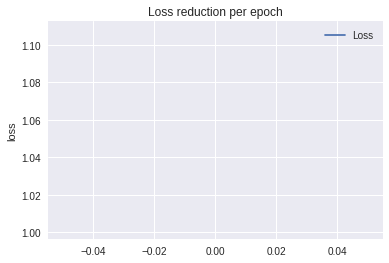

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 1
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score3 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score3[0])
print("\nTest accuracy: ", score3[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 5:

In [15]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[4*split:]


X_train = X_train[:4*split]
y_train_val = y_train[4*split:]
y_train = y_train[:4*split]


(0, 10)


In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 1
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score4 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score4[0])
print("\nTest accuracy: ", score4[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


ValueError: ignored